In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nasos_miacrinq_1=pd.read_csv('nasos_miacrinq_1.csv').dropna()
nasos_miacrinq_2=pd.read_csv('nasos_miacrinq_2.csv').dropna()

In [3]:
def mnk(X, Y):
    a, b = np.polyfit(X, Y, deg=1)

    S_x = np.std(X) ** 2
    S_y = np.std(Y) ** 2
    da = 2 * np.sqrt((S_y/S_x - a ** 2)/(len(X) - 2))
    db = da * np.sqrt(np.mean(X**2))
    
    return a, b, da, db

-0.20576481598566548 +- 0.007112741489324083; 1.4208315552707604 +- 0.035760737804460166
0.0 & 0.5 & 1.0 & 1.5 & 2.0 & 2.5 & 3.0 & 3.5 & 4.0 & 4.5 & 5.0 & 5.5 & 6.0 & 6.5 & 7.0 & 7.5 & 8.0 & 9.0 & 10.0 & 11.0 & 14.0 & 17.5 & 24.5
5.5 & 5.1 & 4.7 & 4.3 & 4.0 & 3.6 & 3.4 & 3.1 & 2.9 & 2.8 & 2.6 & 2.5 & 2.4 & 2.3 & 2.2 & 2.1 & 2.0 & 1.9 & 1.8 & 1.7 & 1.6 & 1.5 & 1.4


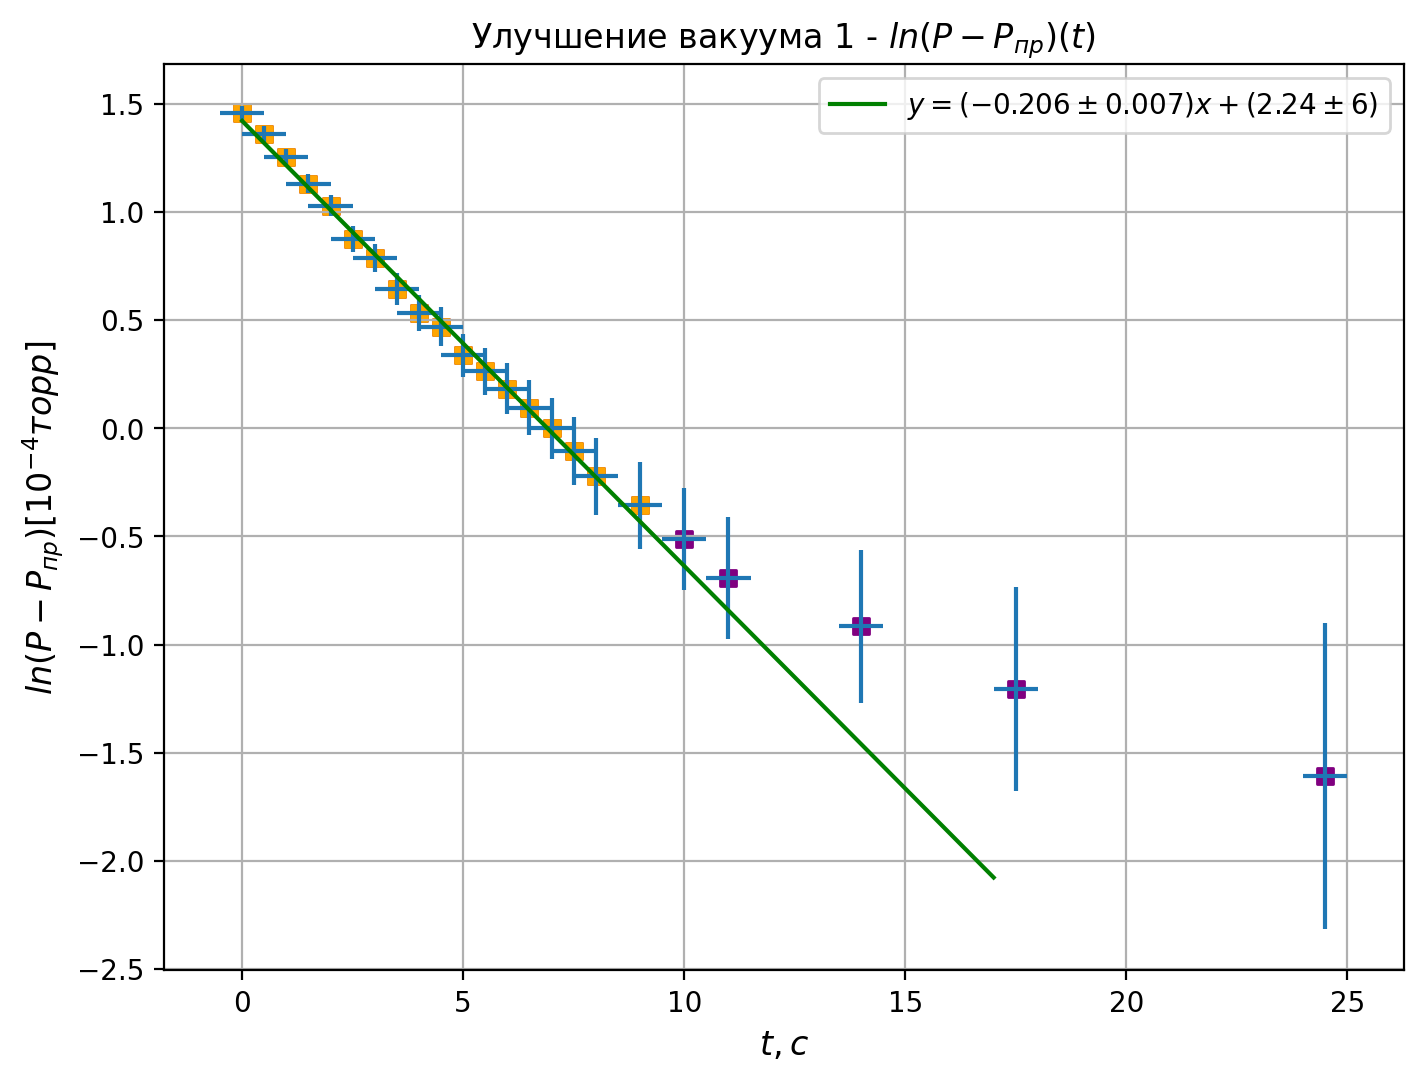

In [4]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"Улучшение вакуума 1 - $ln(P-P_{пр})(t)$")
plt.xlabel(r"$t, с$", fontsize=12)
plt.ylabel(r"$ln(P-P_{пр})[10^{-4}торр]$", fontsize=12)


sl = slice(8, None)
t = nasos_miacrinq_1['t'][sl]; t -= t.iloc[0]
P = nasos_miacrinq_1['P'][sl]

P_pred = 1.2
dP = 0.1

X = t
dX = 0.5

Y = (P - P_pred).map(np.log)
dY = dP * np.sqrt(2) / (P - P_pred)

plt.scatter(X, Y, color='purple', marker='s')
plt.scatter(X[:-5], Y[:-5], color='orange', marker='s')

plt.errorbar(X, Y, xerr=dX, yerr=dY, linestyle='')

a, b, da, db = mnk(X[:-5], Y[:-5])
print(f"{a} +- {da}; {b} +- {db}")

x_mm = np.array([np.min(X), 17])
plt.plot(x_mm, a*x_mm + b, color='green', label=r"$y=(-0.206 \pm 0.007)x+(2.24 \pm 6)$")
plt.legend()

plt.savefig('../pictures/ccum_1.png')

print(' & '.join(list(map(str,list(t)))))
print(' & '.join(list(map(str,list(P)))))

-0.21252530684962767 +- 0.004923008403692588; 1.5540381748331016 +- 0.021669626843055914


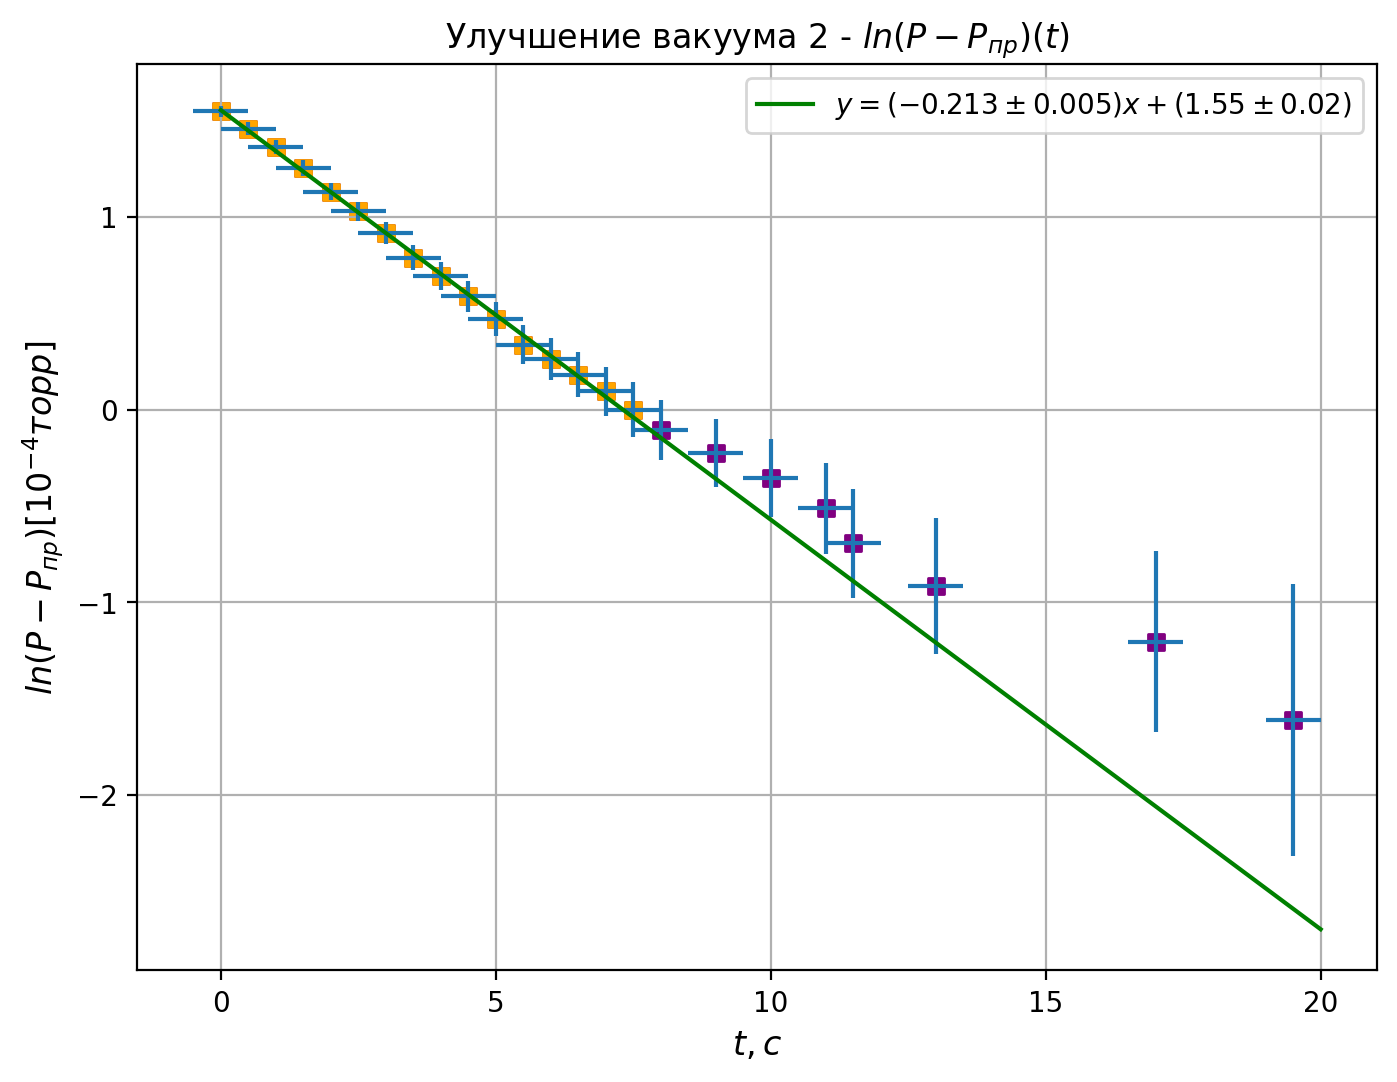

In [5]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"Улучшение вакуума 2 - $ln(P-P_{пр})(t)$")
plt.xlabel(r"$t, с$", fontsize=12)
plt.ylabel(r"$ln(P-P_{пр})[10^{-4}торр]$", fontsize=12)


sl = slice(4, -1)
t = nasos_miacrinq_2['t'][sl]; t -= t.iloc[0]
P = nasos_miacrinq_2['P'][sl]

P_pred = 1.2
dP = 0.1

X = t
dX = 0.5

Y = (P - P_pred).map(np.log)
dY = dP * np.sqrt(2) / (P - P_pred)

plt.scatter(X, Y, color='purple', marker='s')
plt.scatter(X[:-8], Y[:-8], color='orange', marker='s')

plt.errorbar(X, Y, xerr=dX, yerr=dY, linestyle='')

a, b, da, db = mnk(X[:-8], Y[:-8])
print(f"{a} +- {da}; {b} +- {db}")

x_mm = np.array([np.min(X), 20])
plt.plot(x_mm, a*x_mm + b, color='green', label=r"$y=(-0.213 \pm 0.005)x+(1.55 \pm 0.02)$")
plt.legend()

plt.savefig('../pictures/ccum_2.png')

In [6]:
nasos_anjatecinq_1 = pd.read_csv('nasos_anjatecinq_1.csv').dropna()
nasos_anjatecinq_2 = pd.read_csv('nasos_anjatecinq_2.csv').dropna()

0.08371235768007372 +- 0.0019010209621751727; 1.802049704212371 +- 0.049445734291648134


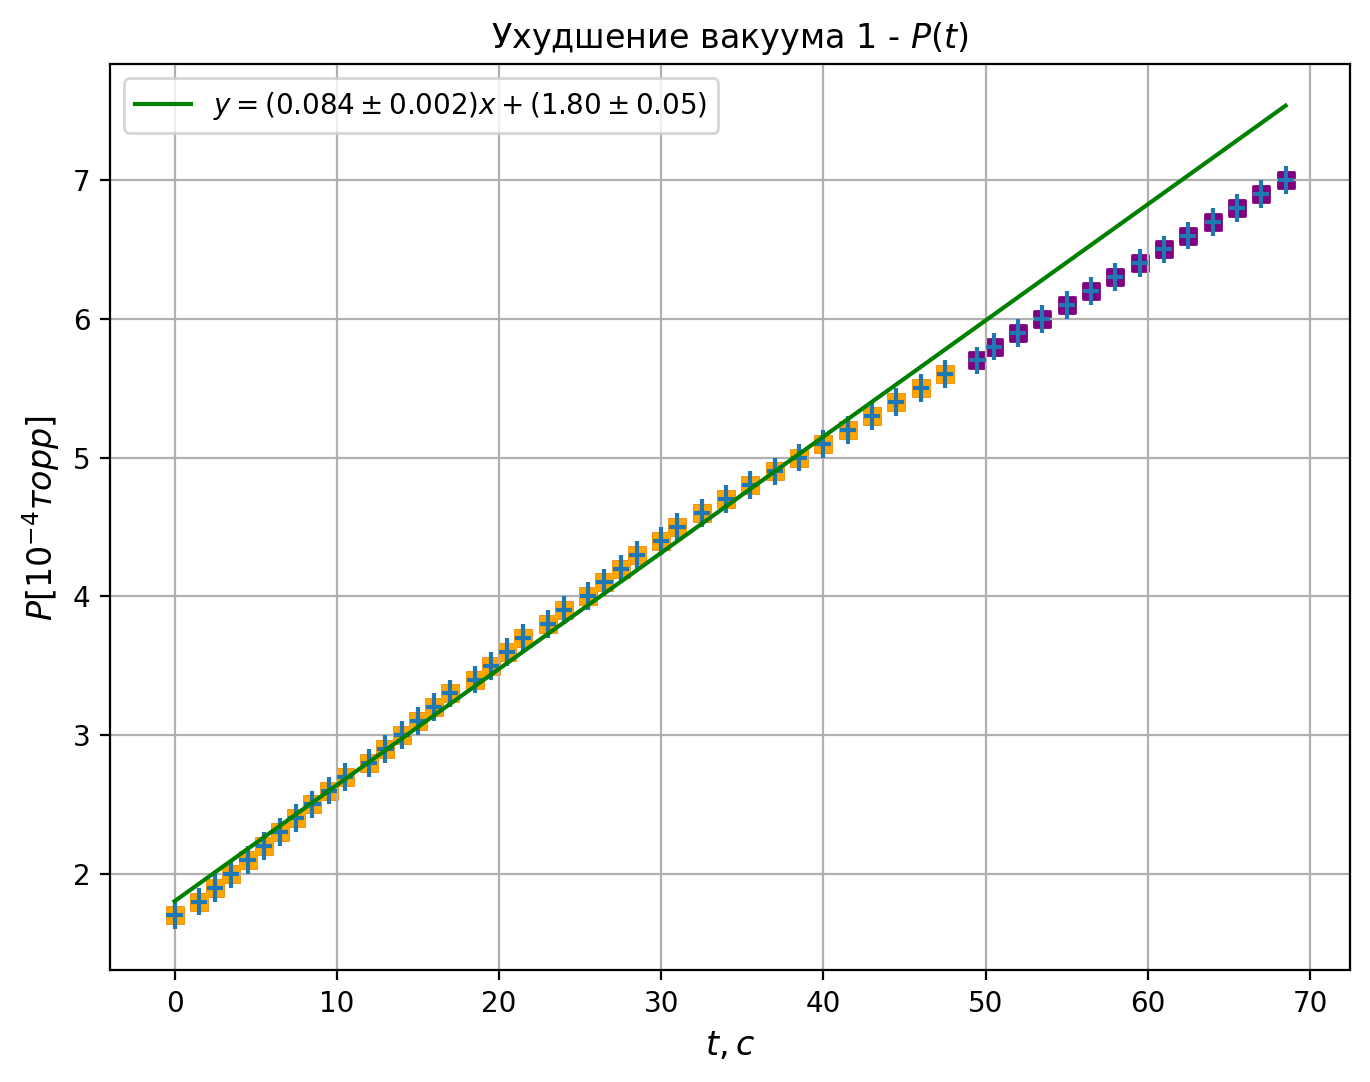

In [7]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"Ухудшение вакуума 1 - $P(t)$")
plt.xlabel(r"$t, с$", fontsize=12)
plt.ylabel(r"$P[10^{-4}торр]$", fontsize=12)


sl = slice(0, None)
t = nasos_anjatecinq_1['t'][sl]; t -= t.iloc[0]
P = nasos_anjatecinq_1['P'][sl]

dP = 0.1

X = t
dX = 0.5

Y = P
dY = dP


mnk_sl = slice(0, 40)

plt.scatter(X, Y, color='purple', marker='s')
plt.scatter(X[mnk_sl], Y[mnk_sl], color='orange', marker='s')


plt.errorbar(X, Y, xerr=dX, yerr=dY, linestyle='')

a, b, da, db = mnk(X[mnk_sl], Y[mnk_sl])
print(f"{a} +- {da}; {b} +- {db}")

x_mm = np.array([np.min(X), np.max(X)])
plt.plot(x_mm, a*x_mm + b, color='green', label=r"$y=(0.084 \pm 0.002)x+(1.80 \pm 0.05)$")
plt.legend()

plt.savefig('../pictures/cccnum_1.png')

0.0818053840512671 +- 0.0010771395718783563; 1.698130618539441 +- 0.02872640061552682


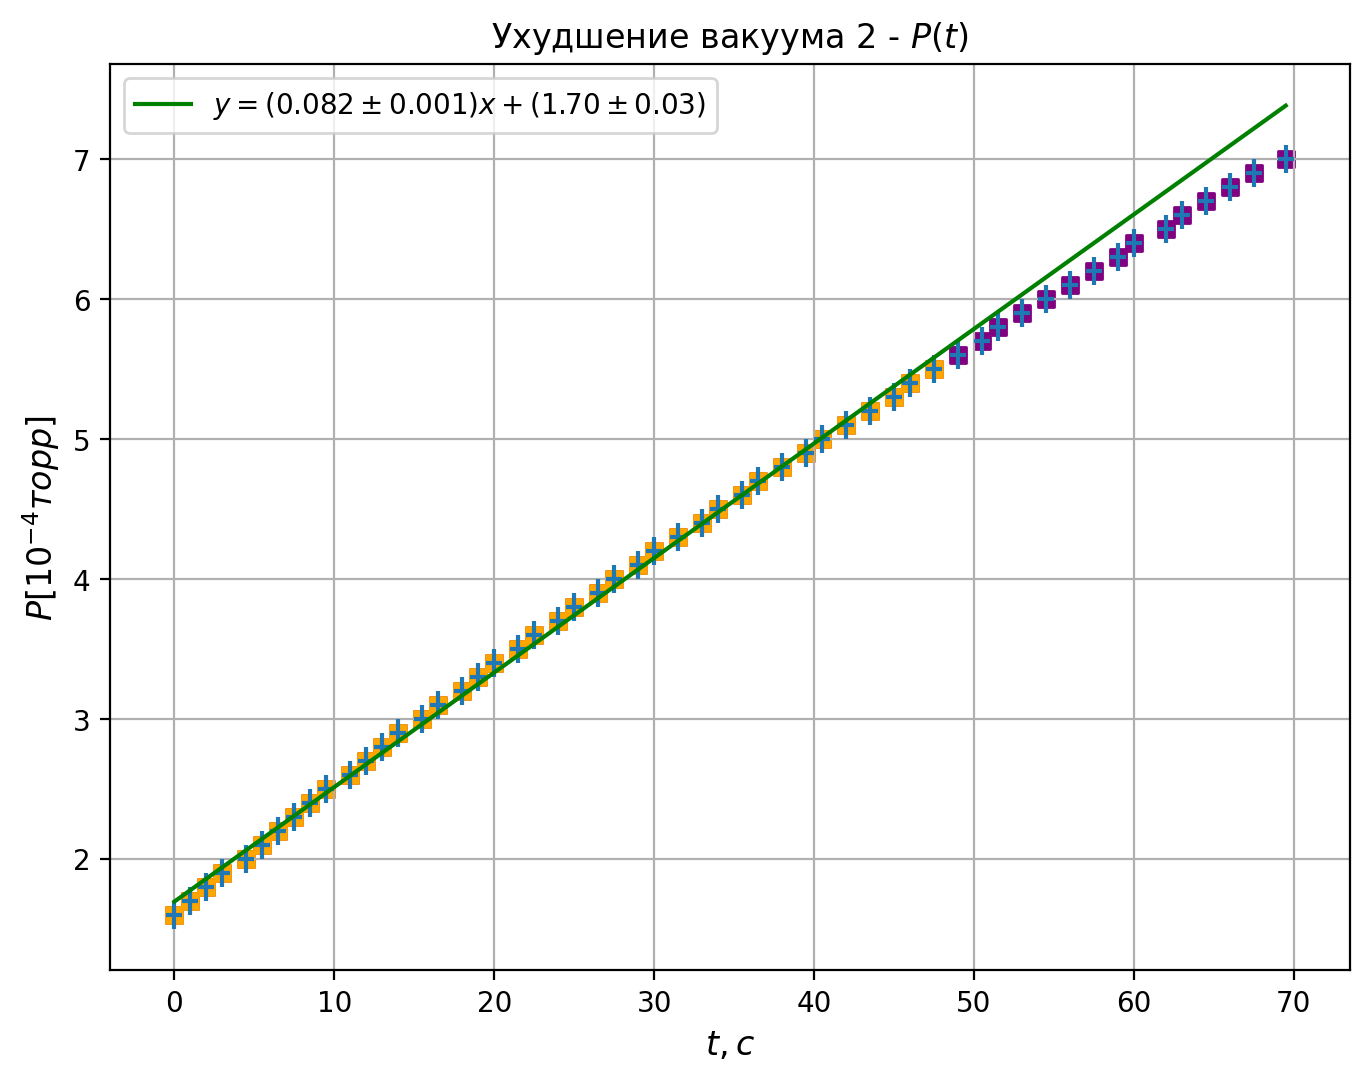

In [8]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"Ухудшение вакуума 2 - $P(t)$")
plt.xlabel(r"$t, с$", fontsize=12)
plt.ylabel(r"$P[10^{-4}торр]$", fontsize=12)


sl = slice(0, None)
t = nasos_anjatecinq_2['t'][sl]; t -= t.iloc[0]
P = nasos_anjatecinq_2['P'][sl]

dP = 0.1

X = t
dX = 0.5

Y = P
dY = dP

mnk_sl = slice(0, 40)


plt.scatter(X, Y, color='purple', marker='s')
plt.scatter(X[mnk_sl], Y[mnk_sl], color='orange', marker='s')

plt.errorbar(X, Y, xerr=dX, yerr=dY, linestyle='')

a, b, da, db = mnk(X[mnk_sl], Y[mnk_sl])
print(f"{a} +- {da}; {b} +- {db}")

x_mm = np.array([np.min(X), np.max(X)])
plt.plot(x_mm, a*x_mm + b, color='green', label=r"$y=(0.082 \pm 0.001)x+(1.70 \pm 0.03)$")
plt.legend()

plt.savefig('../pictures/cccnum_2.png')

In [9]:
table_data = pd.DataFrame(columns=['t_1', 'uluchshenie_1', 't_2', 'uluchshenie_2', 't_3', 'uxudshenie_1', 't_4', 'uxudshenie_2'])
table_data

,t_1,uluchshenie_1,t_2,uluchshenie_2,t_3,uxudshenie_1,t_4,uxudshenie_2


In [10]:
table_data['t_1'] = nasos_miacrinq_1['t']
table_data['uluchshenie_1'] = nasos_miacrinq_1['P']

table_data['t_2'] = nasos_miacrinq_2['t']
table_data['uluchshenie_2'] = nasos_miacrinq_2['P']

table_data['t_3'] = nasos_anjatecinq_1['t']
table_data['uxudshenie_1'] = nasos_anjatecinq_1['P']

table_data['t_4'] = nasos_anjatecinq_2['t']
table_data['uxudshenie_2'] = nasos_anjatecinq_2['P']

table_data

,t_1,uluchshenie_1,t_2,uluchshenie_2,t_3,uxudshenie_1,t_4,uxudshenie_2
0,0.0,7.4,0.0,7.2,0.0,1.7,0.0,1.6
1,0.5,7.3,0.5,7.0,1.5,1.8,1.0,1.7
2,1.0,7.2,1.0,6.7,2.5,1.9,2.0,1.8
3,1.5,7.0,1.5,6.3,3.5,2.0,3.0,1.9
4,2.0,6.8,0.0,5.9,4.5,2.1,4.5,2.0
5,2.5,6.6,0.5,5.5,5.5,2.2,5.5,2.1
6,3.0,6.2,1.0,5.1,6.5,2.3,6.5,2.2
7,3.5,5.9,1.5,4.7,7.5,2.4,7.5,2.3
8,0.0,5.5,2.0,4.3,8.5,2.5,8.5,2.4
9,0.5,5.1,2.5,4.0,9.5,2.6,9.5,2.5


In [13]:
print(table_data.to_latex(index=False).replace('NaN','   ').replace(' '*10,''))

\begin{tabular}{rrrrrrrr}
\toprule
 t\_1 &  uluchshenie\_1 &  t\_2 &  uluchshenie\_2 &  t\_3 &  uxudshenie\_1 &  t\_4 &  uxudshenie\_2 \\
\midrule
 0.0 &  7.4 &  0.0 &  7.2 &  0.0 & 1.7 &  0.0 & 1.6 \\
 0.5 &  7.3 &  0.5 &  7.0 &  1.5 & 1.8 &  1.0 & 1.7 \\
 1.0 &  7.2 &  1.0 &  6.7 &  2.5 & 1.9 &  2.0 & 1.8 \\
 1.5 &  7.0 &  1.5 &  6.3 &  3.5 & 2.0 &  3.0 & 1.9 \\
 2.0 &  6.8 &  0.0 &  5.9 &  4.5 & 2.1 &  4.5 & 2.0 \\
 2.5 &  6.6 &  0.5 &  5.5 &  5.5 & 2.2 &  5.5 & 2.1 \\
 3.0 &  6.2 &  1.0 &  5.1 &  6.5 & 2.3 &  6.5 & 2.2 \\
 3.5 &  5.9 &  1.5 &  4.7 &  7.5 & 2.4 &  7.5 & 2.3 \\
 0.0 &  5.5 &  2.0 &  4.3 &  8.5 & 2.5 &  8.5 & 2.4 \\
 0.5 &  5.1 &  2.5 &  4.0 &  9.5 & 2.6 &  9.5 & 2.5 \\
 1.0 &  4.7 &  3.0 &  3.7 & 10.5 & 2.7 & 11.0 & 2.6 \\
 1.5 &  4.3 &  3.5 &  3.4 & 12.0 & 2.8 & 12.0 & 2.7 \\
 2.0 &  4.0 &  4.0 &  3.2 & 13.0 & 2.9 & 13.0 & 2.8 \\
 2.5 &  3.6 &  4.5 &  3.0 & 14.0 & 3.0 & 14.0 & 2.9 \\
 3.0 &  3.4 &  5.0 &  2.8 & 15.0 & 3.1 & 15.5 & 3.0 \\
 3.5 &  3.1 &  5.5 &  2.6 & 

/tmp/ipykernel_125867/3940067953.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table_data.to_latex(index=False).replace('NaN','   ').replace(' '*10,''))


In [14]:
pd.DataFrame.to_latex?